In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image


import sys
sys.path.append('../Research Paper/')

### Get sample Support/Query Set

In [6]:
images_and_ids = pd.read_csv('../Research Paper/data/training_10samples.csv')
images_and_ids

,Image,Id,class_count
0,0000e88ab.jpg,w_f48451c,14
1,000a6daec.jpg,w_dd88965,16
2,001cae55b.jpg,w_581ba42,14
3,004e8ad5b.jpg,w_3de579a,54
4,004f87702.jpg,w_1d0830e,11
...,...,...,...
3569,ffad54783.jpg,w_f0fe284,45
3570,ffc0dd0dc.jpg,w_4a28f21,13
3571,ffcd5efdc.jpg,w_f765256,34
3572,ffe52d320.jpg,w_bc285a6,21


In [7]:
sample_support_labels = ['w_bfe77d0', 'w_db68456', 'w_b71ac68']

In [9]:
sample_support_set = {}
for label in sample_support_labels:
    sample_support_set[label] = np.random.choice(images_and_ids[images_and_ids['Id'] == label]['Image'], size=3, replace=False)

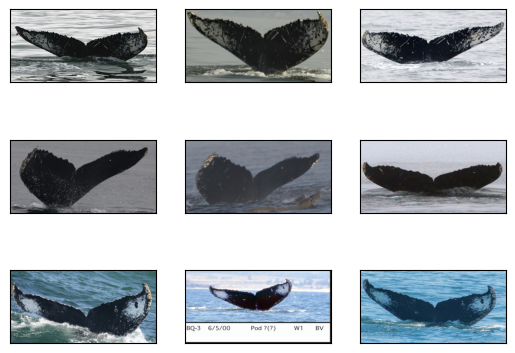

In [26]:
fig, axs = plt.subplots(3, 3)

for i, (label, images) in enumerate(sample_support_set.items()):
    for j, image in enumerate(images):
        img = Image.open(f'/workspaces/creating-ai-enabled-systems/Research Paper/data/train/{image}')
        img = img.resize((512, 256))

        axs[i,j].imshow(img)

        axs[i,j].tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

fig.savefig('sample_support_set.png', transparent=True)

In [20]:
sample_query_set = []
for label, images in sample_support_set.items():
    filtered_images = images_and_ids[
        (images_and_ids['Id'] == label) &
        (~images_and_ids['Image'].isin(images))
    ]['Image']
    sample_query_set += np.random.choice(filtered_images, size=1, replace=False).tolist()

In [21]:
sample_query_set

['9322ebf96.jpg', '71b00cc8e.jpg', '78d259ec3.jpg']

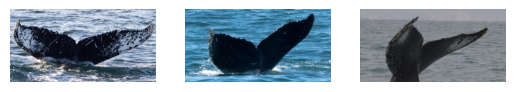

In [27]:
fig, axs = plt.subplots(1, 3)

for i, image in enumerate(sample_query_set):
    img = Image.open(f'/workspaces/creating-ai-enabled-systems/Research Paper/data/train/{image}')
    img = img.resize((512, 256))

    axs[i].imshow(img)
    axs[i].axis('off')

fig.savefig('sample_query_set.png', transparent=True)

### Preprocess two example images

In [3]:
rectangle_image = Image.open('/workspaces/creating-ai-enabled-systems/Systems Project/images/rectangle-image.jpg')
square_image = Image.open('/workspaces/creating-ai-enabled-systems/Systems Project/images/square-image.jpg')


In [7]:
rectangle_image_resized = rectangle_image.resize((512, 256))
square_image_resized = square_image.resize((512, 256))

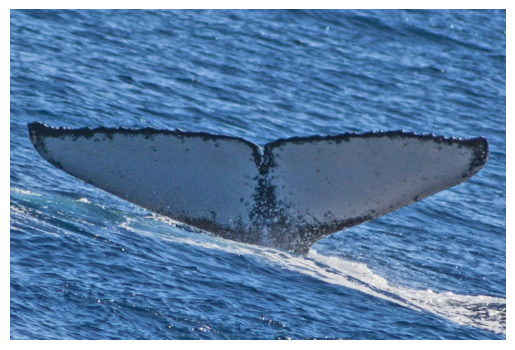

In [18]:
plt.imshow(square_image)
plt.axis('off');

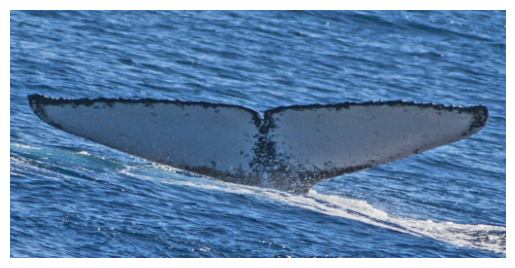

In [14]:
plt.imshow(square_image_resized)
plt.axis('off')
plt.savefig('images/square-image-resized.jpg',  transparent=True)

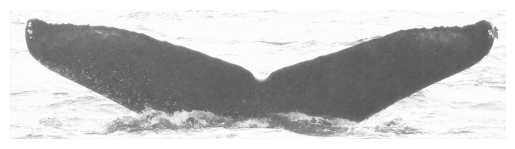

In [17]:
plt.imshow(rectangle_image)
plt.axis('off');
# plt.savefig('images/rectangle-image-resized.jpg', transparent=True)

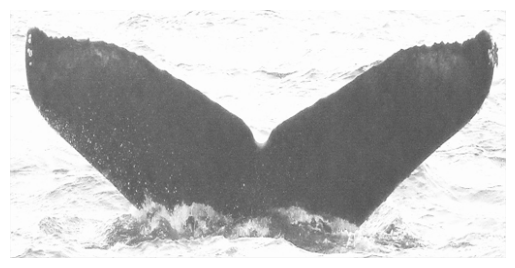

In [15]:
plt.imshow(rectangle_image_resized)
plt.axis('off')
plt.savefig('images/rectangle-image-resized.jpg', transparent=True)